# Regress TC track onto Nino 3.4 index 
# and compare track anomalies during warm phase vs. cold phase

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import hvplot.xarray
import matplotlib
import matplotlib.pyplot as plt`
import time
import dask
import warnings
warnings.filterwarnings('ignore')

In [2]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature

![](../genesis_density_week1-5.jpg)

## 1. get nino 3.4 time series

In [7]:
r=pd.read_fwf('../nino34.long.data', header=None)

In [8]:
dates = pd.date_range('2002',periods=18,freq='1Y')

In [9]:
dates.year

Int64Index([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64')

In [10]:
r = r.set_axis(dates.year, axis='index')
r = r.set_axis(np.arange(0,13),axis='columns')
r = r.transpose()

In [11]:
nino34 = []
for iy in np.arange(2002,2020):
    nino34.append(r[iy][1:13].array.to_numpy())

In [12]:
ninoarray = xr.DataArray(nino34,dims=['year','month'])

In [13]:
stacked = ninoarray.stack(time=('year','month'))

In [14]:
stacked

<xarray.DataArray (time: 216)>
array([26.44, 26.76, 27.36, 27.91, 28.07, 28.37, 27.8 , 27.57, 27.57,
       27.89, 28.06, 28.  , 27.56, 27.4 , 27.74, 27.74, 27.34, 27.5 ,
       27.37, 26.92, 26.9 , 27.19, 27.05, 26.91, 26.84, 26.93, 27.16,
       27.83, 27.96, 27.82, 27.64, 27.54, 27.42, 27.46, 27.27, 27.3 ,
       27.14, 27.02, 27.54, 28.05, 28.16, 27.91, 27.22, 26.83, 26.67,
       26.59, 26.21, 25.83, 25.6 , 26.05, 26.53, 27.47, 27.76, 27.78,
       27.25, 27.25, 27.38, 27.49, 27.64, 27.69, 27.17, 26.88, 27.11,
       27.61, 27.47, 27.52, 26.86, 26.31, 25.71, 25.33, 25.07, 24.98,
       24.79, 25.07, 26.09, 26.88, 27.22, 27.24, 27.19, 26.83, 26.47,
       26.43, 26.29, 25.69, 25.58, 26.05, 26.54, 27.52, 28.04, 28.17,
       27.91, 27.49, 27.43, 27.69, 28.15, 28.4 , 28.  , 27.94, 28.33,
       28.33, 27.72, 27.07, 26.34, 25.55, 25.19, 25.08, 25.08, 24.95,
       24.88, 25.5 , 26.27, 27.03, 27.34, 27.43, 27.  , 26.22, 25.99,
       25.81, 25.56, 25.54, 25.65, 26.15, 26.78, 27.48, 27.69, 27.82,
       27.66, 27.54, 27.19, 26.96, 26.98, 26.45, 26.16, 26.36, 27.12,
       27.69, 27.59, 27.36, 26.94, 26.59, 26.66, 26.49, 26.64, 26.5 ,
       26.16, 26.31, 27.19, 28.05, 28.32, 28.16, 27.36, 27.02, 27.12,
       27.22, 27.54, 27.36, 27.17, 27.34, 27.73, 28.67, 28.9 , 28.96,
       28.78, 28.75, 28.76, 28.94, 29.23, 29.14, 29.14, 28.87, 28.86,
       28.82, 28.32, 27.75, 26.97, 26.4 , 26.29, 25.99, 26.02, 26.07,
       26.24, 26.75, 27.17, 27.99, 28.17, 27.91, 27.44, 26.69, 26.2 ,
       26.21, 25.81, 25.74, 25.72, 26.03, 26.53, 27.41, 27.75, 27.81,
       27.49, 26.93, 27.05, 27.57, 27.65, 27.56, 27.09, 27.38, 28.06,
       28.44, 28.48, 28.34, 27.64, 27.07, 26.86, 27.29, 27.39, 27.1 ])
Coordinates:
  * time     (time) MultiIndex
  - year     (time) int64 0 0 0 0 0 0 0 0 0 0 ... 17 17 17 17 17 17 17 17 17 17
  - month    (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 ... 1 2 3 4 5 6 7 8 9 10 11

In [15]:
stacked['time'] = pd.date_range('20020101','20191231',freq='1M')
stacked.name = 'nino34'
stacked = (stacked -  stacked.mean('time')) /stacked.std('time')
stacked_rollilng = stacked.rolling(time=5).mean()

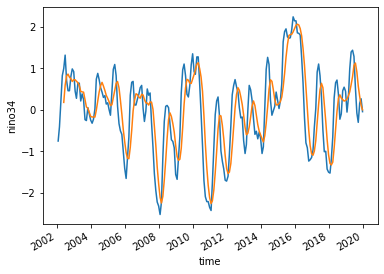

In [16]:
stacked.plot()
stacked_rollilng.plot()

## 2. read in TC track data

In [261]:
del(ds)

In [289]:
ds = xr.open_dataset('../tc_track_density.nc')
ds

<xarray.Dataset>
Dimensions:   (lat: 37, lon: 72, time: 216, week: 5)
Coordinates:
  * lat       (lat) float32 -90.0 -85.0 -80.0 -75.0 ... 75.0 80.0 85.0 90.0
  * lon       (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
Dimensions without coordinates: time, week
Data variables:
    count     (week, time, lat, lon) float32 ...
    countobs  (time, lat, lon) float32 ...

In [290]:
countobs = ds.countobs
count = ds['count']

In [291]:
count['week'] = [1,2,3,4,5]

In [292]:
countobs['time'] = stacked.time
count['time'] = stacked.time

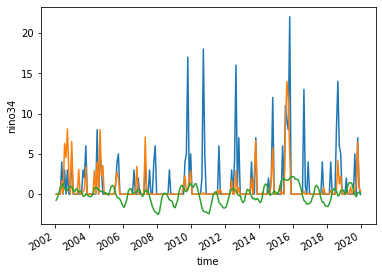

In [293]:
countobs.sel(lat=15, lon=140).plot()
count.sel(lat=15, lon=140,week=1).plot()
stacked.plot()


## 3. perform regression analysis

In [294]:
# change dim val to perform regression
countobs['time'] = stacked
count['time'] = stacked

In [295]:
regobs = countobs.polyfit(dim='time', deg=1)
reg = count.polyfit(dim='time',deg=1)

In [296]:
reg

<xarray.Dataset>
Dimensions:               (degree: 2, lat: 37, lon: 72, week: 5)
Coordinates:
  * degree                (degree) int64 1 0
  * week                  (week) int64 1 2 3 4 5
  * lat                   (lat) float64 -90.0 -85.0 -80.0 ... 80.0 85.0 90.0
  * lon                   (lon) float64 0.0 5.0 10.0 15.0 ... 345.0 350.0 355.0
Data variables:
    polyfit_coefficients  (degree, week, lat, lon) float64 0.0 0.0 ... 0.0 0.0

In [297]:
fitobs = xr.polyval(coord=countobs.time, coeffs=regobs.polyfit_coefficients)
fit = xr.polyval(coord=count.time, coeffs=reg.polyfit_coefficients)

In [298]:
fitobs['time'] = stacked.time
fit['time']= stacked.time

countobs['time'] = stacked.time
count['time'] = stacked.time

In [299]:
countobs_std = (countobs - countobs.mean('time'))/countobs.std('time')

## 4. find differences between warm and cold El Nino phases

- the S2S hindcast:

In [300]:
fitwarm = fit.where(stacked_rollilng>0.5)
fitcold = fit.where(stacked_rollilng<0.5)

In [301]:
diff = fitwarm.mean('time') - fitcold.mean('time')

- the observed track

In [303]:
fitobswarm = fitobs.where(stacked_rollilng>0.5)
fitobscold = fitobs.where(stacked_rollilng<0.5)

In [304]:
diffobs = fitobswarm.mean('time') - fitobscold.mean('time')

In [306]:
from geocat.viz import util as gvutil
from geocat.viz import cmaps as gvcmaps

In [307]:

def plot_track_panels(var, nrows, ncols, i, levels, ticks, cmap,title):
    ax1= fig.add_subplot(nrows, ncols, i,projection=ccrs.PlateCarree(central_longitude=180))
    ax1.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
    ax1.add_feature(cfeature.COASTLINE, linewidth=0.5, zorder=1)
    contour = var.plot.contourf(ax=ax1,
                           transform=ccrs.PlateCarree(),
                           levels=levels,
                            cmap = cmap,
                           extend='both',
                           add_colorbar=False,
                           add_labels=False,
                            zorder=0)
    plt.colorbar(contour,
                     ax=ax1,
                     ticks=ticks,
                     orientation='horizontal',
                     pad=0.14,
                     drawedges=True,
                     shrink=0.5)

    gvutil.set_titles_and_labels(ax1,maintitle=title,
                             maintitlefontsize=15)
    gvutil.set_axes_limits_and_ticks(ax1, xlim=(-180, 180),
                                 ylim=(-60, 60),
                                 xticks=np.linspace(-180, 180, 10),
                                 yticks=np.linspace(-90, 90, 7))

    gvutil.add_major_minor_ticks(ax1, labelsize=12)
    gvutil.add_lat_lon_ticklabels(ax1)




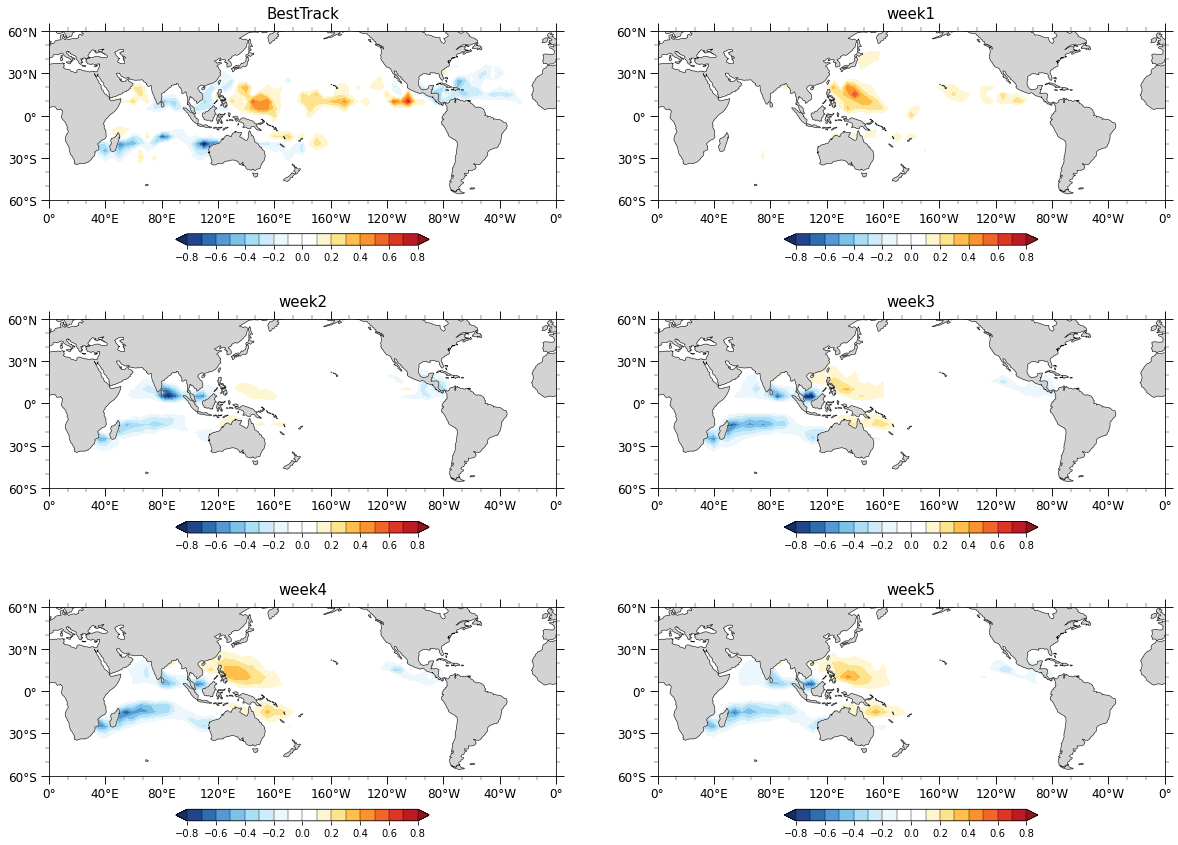

In [308]:
fig=plt.figure(figsize=(20,15))
levels = np.linspace(-.8, .8, 17)
ticks = np.linspace(-0.8, 0.8, 9)
cmap= gvcmaps.BlueWhiteOrangeRed
plot_track_panels(diffobs,3, 2, 1,levels,ticks,cmap, 'BestTrack')
plot_track_panels(diff.sel(week=1),3, 2, 2,levels,ticks,cmap,'week1')
plot_track_panels(diff.sel(week=2),3, 2, 3,levels,ticks,cmap,'week2')
plot_track_panels(diff.sel(week=3),3, 2, 4,levels,ticks,cmap,'week3')
plot_track_panels(diff.sel(week=4),3, 2, 5,levels,ticks,cmap,'week4')
plot_track_panels(diff.sel(week=5),3, 2, 6,levels, ticks,cmap,'week5')

In [318]:
corr = xr.corr(count, countobs,dim='time')
#corr = corr.where()

In [319]:
t= corr * np.sqrt(N-2) / np.sqrt(1-corr**2)

In [320]:
N = countobs.where(countobs>0).count(dim='time')

In [321]:
corr = corr.where(t>1.66)

### write out the data and plot with ncl 

In [322]:
corr.name = 'coefficient'

In [323]:
corr.to_dataset().to_netcdf("track_density_correlation_coefficient.nc")

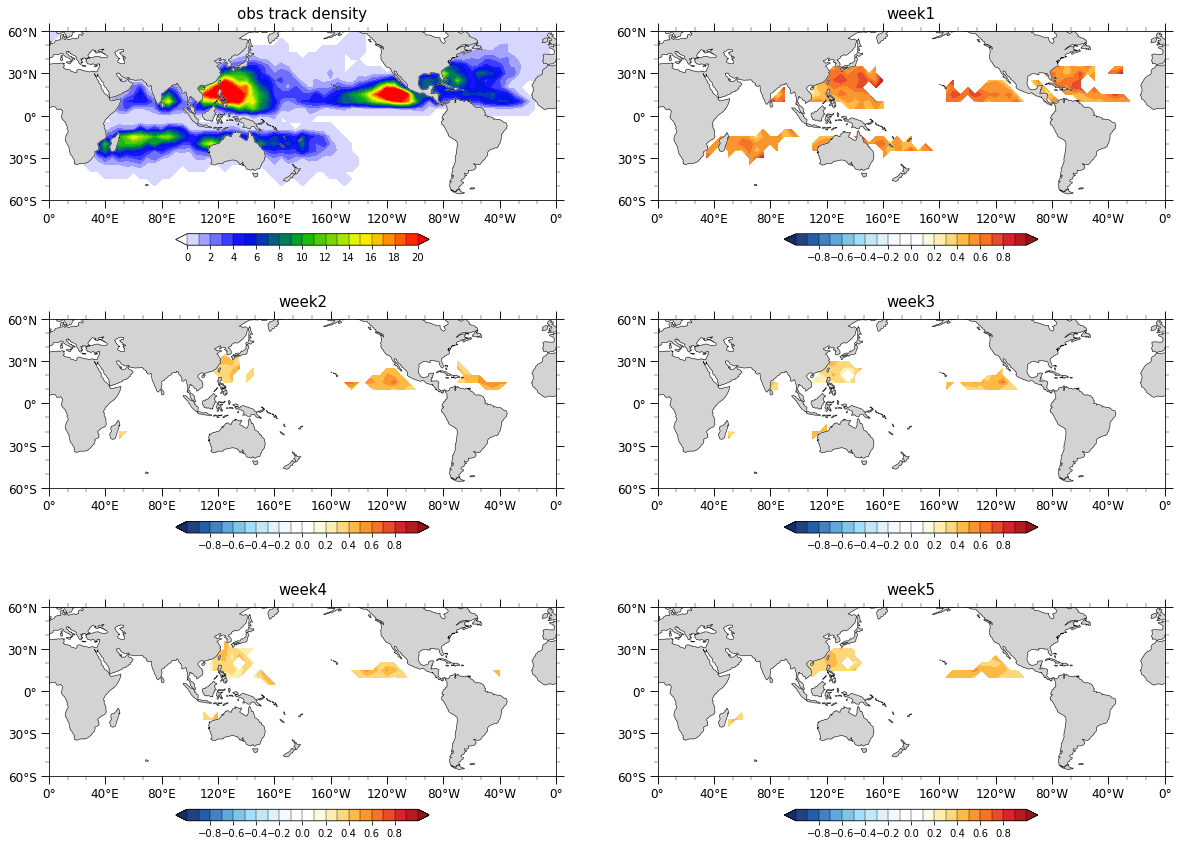

In [324]:
fig=plt.figure(figsize=(20,15))
levels = np.linspace(-1,1,21)

plot_track_panels(countobs.sum('time')/18,3, 2, 1,np.linspace(0,20,21),np.linspace(0,20,11),gvcmaps.WhBlGrYeRe,'obs track density')
plot_track_panels(corr.sel(week=1),3, 2, 2,levels,ticks,cmap,'week1')
plot_track_panels(corr.sel(week=2),3, 2, 3,levels,ticks,cmap,'week2')
plot_track_panels(corr.sel(week=3),3, 2, 4,levels,ticks,cmap,'week3')
plot_track_panels(corr.sel(week=4),3, 2, 5,levels,ticks,cmap,'week4')
plot_track_panels(corr.sel(week=5),3, 2, 6,levels,ticks,cmap,'week5')

In [325]:
corr.sel(week=1).where(corr.sel(week=1)>0.9,drop=True).lon

<xarray.DataArray 'lon' (lon: 4)>
array([160., 185., 190., 200.], dtype=float32)
Coordinates:
  * lon      (lon) float32 160.0 185.0 190.0 200.0
    week     int64 1
Attributes:
    units:    degrees_east

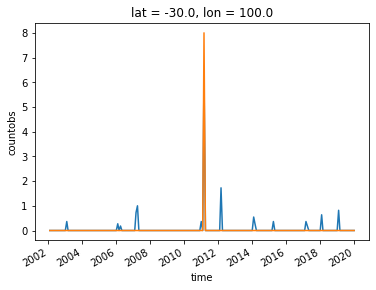

In [326]:
count.sel(week=1, lat=-30,lon=100).plot()
countobs.sel(lat=-30, lon = 100).plot()

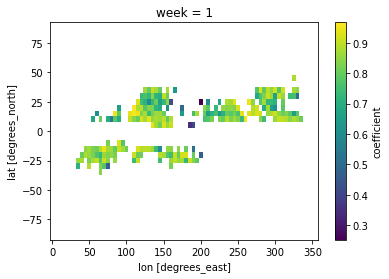

In [327]:
np.sqrt(1-corr**2).sel(week=1).plot()

In [328]:
countobs['time'].size

216

In [329]:
xr.corr(count.sel(week=1, lat=30,lon=125), countobs.sel(lat=30, lon = 125))

<xarray.DataArray ()>
array(0.65003815)
Coordinates:
    lat      float32 30.0
    lon      float32 125.0
    week     int64 1